In [19]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [20]:
Claims = read.csv('data/ClaimsData.csv.xz')
str(Claims)

'data.frame':	458005 obs. of  16 variables:
 $ age              : int  85 59 67 52 67 68 75 70 67 67 ...
 $ alzheimers       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arthritis        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cancer           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ copd             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ depression       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ diabetes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ heart.failure    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ihd              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ kidney           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ osteoporosis     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stroke           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ reimbursement2008: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2008       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ reimbursement2009: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2009       : int  1 1 1 1 1 1 1 1 1 1 ...


In [21]:
table(Claims$bucket2009) / nrow(Claims)


          1           2           3           4           5 
0.671267781 0.190170413 0.089466272 0.043324855 0.005770679 

In [22]:
as.data.frame(table(Claims$bucket2009) / nrow(Claims))

,Var1,Freq
1,1,0.6712678
2,2,0.1901704
3,3,0.08946627
4,4,0.04332485
5,5,0.005770679


In [23]:
library(caTools)
set.seed(88)
spl = sample.split(Claims$bucket2009, SplitRatio=0.6)
ClaimsTrain = subset(Claims, spl==T)
ClaimsTest = subset(Claims, spl==F)

In [24]:
mean(ClaimsTrain$age)
table(ClaimsTrain$diabetes)

[1] 72.63773


     0      1 
170131 104672 

In [25]:
104672/(nrow(ClaimsTrain))

[1] 0.3808983

In [26]:
summary(ClaimsTrain)

      age           alzheimers       arthritis          cancer       
 Min.   : 26.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.: 67.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000  
 Median : 73.00   Median :0.0000   Median :0.0000   Median :0.00000  
 Mean   : 72.64   Mean   :0.1928   Mean   :0.1546   Mean   :0.06402  
 3rd Qu.: 81.00   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000  
 Max.   :100.00   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
      copd          depression        diabetes      heart.failure   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1369   Mean   :0.2129   Mean   :0.3809   Mean   :0.2852  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      ihd             kidne

In [27]:
table(ClaimsTest$bucket2009, ClaimsTest$bucket2008)

   
         1      2      3      4      5
  1 110138   7787   3427   1452    174
  2  16000  10721   4629   2931    559
  3   7006   4629   2774   1621    360
  4   2688   1943   1415   1539    352
  5    293    191    160    309    104

In [28]:
(110138+10721+2774+1539+104)/nrow(ClaimsTest)

[1] 0.6838135

In [29]:
PenaltyMatrix = matrix(c(0,1,2,3,4,
                         2,0,1,2,3,
                         4,2,0,1,2,
                         6,4,2,0,1,
                         8,6,4,2,0),
                       byrow=T,
                       nrow=5)
PenaltyMatrix

0,1,2,3,4
2,0,1,2,3
4,2,0,1,2
6,4,2,0,1
8,6,4,2,0


In [30]:
as.matrix(table(ClaimsTest$bucket2009,
                ClaimsTest$bucket2008)) *
    PenaltyMatrix

   
        1     2     3     4     5
  1     0  7787  6854  4356   696
  2 32000     0  4629  5862  1677
  3 28024  9258     0  1621   720
  4 16128  7772  2830     0   352
  5  2344  1146   640   618     0

In [31]:
sum(as.matrix(table(ClaimsTest$bucket2009,
                    ClaimsTest$bucket2008)) *
    PenaltyMatrix)/nrow(ClaimsTest)

[1] 0.7386055

In [36]:
head(ClaimsTest$bucket2008)

[1] "integer"

In [55]:
ones = rep.int(1, length(ClaimsTest$bucket2008))
tab = table(ClaimsTest$bucket2009, ones)
tab

   ones
         1
  1 122978
  2  34840
  3  16390
  4   7937
  5   1057

In [47]:
122978/(122978+34840+16390+7937+1057)

[1] 0.67127

In [61]:
mones = cbind(tab, matrix(rep.int(0, 20), 5, 4))
#mones
sum(as.matrix(mones) *
    PenaltyMatrix)/nrow(ClaimsTest)

[1] 1.044301

In [62]:
table(ClaimsTest$bucket2009)


     1      2      3      4      5 
122978  34840  16390   7937   1057 

In [63]:
library(rpart)
library(rpart.plot)

In [64]:
ClaimsTree = rpart(bucket2009 ~ age + arthritis +
                   alzheimers + cancer + copd +
                   depression + diabetes +
                   heart.failure + ihd +
                   kidney + osteoporosis +
                   stroke + bucket2008 +
                   reimbursement2008,
                   data=ClaimsTrain,
                   method='class', cp=0.00005)

Warning message:
: labs do not fit even at cex 0.15, there may be some overplotting

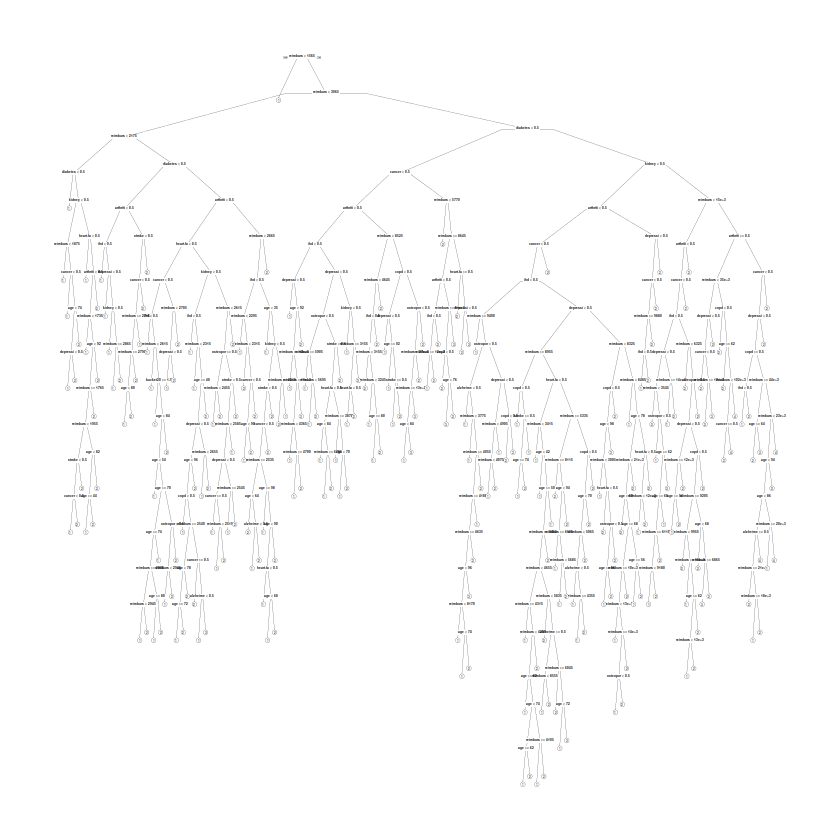

In [65]:
prp(ClaimsTree)

In [66]:
PredictTest = predict(ClaimsTree,
                      newdata=ClaimsTest,
                      type='class')
table(ClaimsTest$bucket2009, PredictTest)

   PredictTest
         1      2      3      4      5
  1 114141   8610    124    103      0
  2  18409  16102    187    142      0
  3   8027   8146    118     99      0
  4   3099   4584     53    201      0
  5    351    657      4     45      0

In [67]:
(114141+16102+118+201+0)/nrow(ClaimsTest)

[1] 0.7126669

In [69]:
as.matrix(table(ClaimsTest$bucket2009,
                PredictTest)) * PenaltyMatrix

   PredictTest
        1     2     3     4     5
  1     0  8610   248   309     0
  2 36818     0   187   284     0
  3 32108 16292     0    99     0
  4 18594 18336   106     0     0
  5  2808  3942    16    90     0

In [71]:
sum(as.matrix(
    table(ClaimsTest$bucket2009,
          PredictTest)) * PenaltyMatrix) /
    nrow(ClaimsTest)

[1] 0.7578902

In [73]:
ClaimsTree = rpart(bucket2009 ~ age + arthritis +
                   alzheimers + cancer + copd +
                   depression + diabetes +
                   heart.failure + ihd +
                   kidney + osteoporosis +
                   stroke + bucket2008 +
                   reimbursement2008,
                   data=ClaimsTrain,
                   method='class', cp=0.00005,
                   parms=list(loss=PenaltyMatrix))

In [74]:
PredictTest = predict(ClaimsTree,
                      newdata=ClaimsTest,
                      type='class')
table(ClaimsTest$bucket2009, PredictTest)

   PredictTest
        1     2     3     4     5
  1 94310 25295  3087   286     0
  2  7176 18942  8079   643     0
  3  3590  7706  4692   401     1
  4  1304  3193  2803   636     1
  5   135   356   408   156     2

In [75]:
(94310+18942+4692+636+2)/nrow(ClaimsTest)

[1] 0.6472746

In [76]:
sum(as.matrix(
    table(ClaimsTest$bucket2009,
          PredictTest)) * PenaltyMatrix) /
    nrow(ClaimsTest)

[1] 0.6418161